**1.**

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): 

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. 

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). 

Произвести расчет как с использованием intercept с учетом b0, так и без.

In [42]:
import numpy as np
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])                    #значения величины заработной платы
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])               #значения кредитного скоринга

коэф_b = (np.mean(zp*ks) - np.mean(zp)*np.mean(ks))/(np.mean(zp**2) - np.mean(zp)**2) 
коэф_b                                                                          #значение коэф. b

2.620538882402765

In [4]:
коэф_a = ks.mean() - коэф_b * zp.mean()
коэф_a                                                                          #значение коэф. a

444.1773573243596

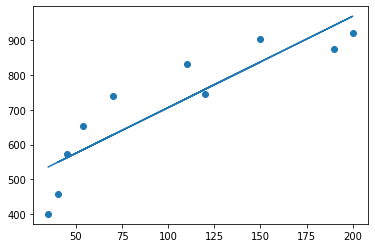

In [6]:
#График:
import matplotlib.pyplot as plt
plt.scatter(zp, ks)
plt.plot(zp, коэф_a + коэф_b * zp)

In [48]:
mse_1 = np.sum(((коэф_a + коэф_b * zp) - ks) ** 2 / 10)
mse_1

6470.414201176659

*Без intercept:*

In [43]:
zp = zp.reshape(1,len(zp))
ks = ks.reshape(1,len(ks))
np.dot(np.dot(np.linalg.inv(np.dot(zp, zp.T)), zp), ks.T)

array([[5.88982042]])

In [49]:
mse_2 = np.sum(((0 + 5.88982042 * zp) - ks) ** 2 / 10)
mse_2

56516.85841571942

In [50]:
#коэффициенты a и b с помощью numpy:
zp = np.vstack([np.ones((1, 10)), zp])
np.dot(np.dot(np.linalg.inv(np.dot(zp, zp.T)), zp), ks.T)                       


array([[444.17735732],
       [  2.62053888]])

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept без b0).

Указания к решению: 

alpha=1e-6

Количество итераций: более 4000

Матрицы выводить


In [54]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
alpha = 1e-6
b1 = 0.1
def mse_(w1, y=ks, X=zp, n=10):
    return np.sum((b1 * X - y) ** 2) / n
for i in range(5000):                                                #Количество итераций: 5000
    fp = (1 / 10) * np.sum(2 * (b1 * zp - ks) * zp)
    b1 -= alpha * fp
    if i % 100 == 0:
        print(f'iteration: {i}, b1 : {b1}, mse: {mse_(b1) }')
    

iteration: 0, b1 : 0.25952808000000005, mse: 493237.7212546963
iteration: 100, b1 : 5.54537842245223, mse: 58151.31823171113
iteration: 200, b1 : 5.868748638669329, mse: 56522.97550129376
iteration: 300, b1 : 5.888531320728348, mse: 56516.88130936019
iteration: 400, b1 : 5.8897415574471985, mse: 56516.85850140053
iteration: 500, b1 : 5.889815595583751, mse: 56516.858416040064
iteration: 600, b1 : 5.889820124983314, mse: 56516.85841572062
iteration: 700, b1 : 5.889820402076462, mse: 56516.85841571941
iteration: 800, b1 : 5.88982041902807, mse: 56516.8584157194
iteration: 900, b1 : 5.889820420065112, mse: 56516.85841571941
iteration: 1000, b1 : 5.8898204201285544, mse: 56516.85841571941
iteration: 1100, b1 : 5.889820420132437, mse: 56516.85841571943
iteration: 1200, b1 : 5.889820420132673, mse: 56516.85841571943
iteration: 1300, b1 : 5.889820420132673, mse: 56516.85841571943
iteration: 1400, b1 : 5.889820420132673, mse: 56516.85841571943
iteration: 1500, b1 : 5.889820420132673, mse: 5651

**3.** 
Однофакторный дисперсионный анализ

Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов: 

Футболисты: 173, 175, 180, 178, 177, 185, 183, 182. 

Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180. 

Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.


In [56]:
футболисты = np.array([173, 175, 180, 178, 177, 185, 183, 182])
хоккеисты = np.array([177, 179, 180, 188, 177, 172, 171, 184, 180])
штангисты = np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170])

print(f'Средний рост футболистов {футболисты.mean()}')
print(f'Средний рост хоккеистов {хоккеисты.mean()}')
print(f'Средний рост штангистов {штангисты.mean()}')

Средний рост футболистов 179.125
Средний рост хоккеистов 178.66666666666666
Средний рост штангистов 172.72727272727272


In [57]:
рост_всех = np.hstack((футболисты,хоккеисты, штангисты))
средний_рост_всех = рост_всех.mean()
средний_рост_всех

176.46428571428572

In [67]:
all_s2 = np.sum((рост_всех - средний_рост_всех) ** 2)       
s2f = (футболисты.mean() - средний_рост_всех) ** 2 * len(футболисты) + (хоккеисты.mean() - средний_рост_всех) ** 2 * len(хоккеисты) + (штангисты.mean() - рост_всех.mean()) ** 2 * len(штангисты)
s2_ost = np.sum((футболисты - футболисты.mean()) ** 2) + np.sum((хоккеисты - хоккеисты.mean()) ** 2) + np.sum((штангисты - штангисты.mean()) ** 2)
s2_ost + s2f

830.964285714286

In [62]:
общая_дисперсия = all_s2/(len(рост_всех) - 1)
общая_дисперсия

30.776455026455015

In [63]:
факторная_дисперсия = s2f/(3 - 1)
факторная_дисперсия

126.9537337662339

In [64]:
остаточная_дисперсия = s2_ost/(len(рост_всех) - 3)
остаточная_дисперсия

23.08227272727273

In [68]:
F_m = факторная_дисперсия / остаточная_дисперсия
F_m

5.500053450812598

In [66]:
alpha = 0.05
d_f1 = 3 - 1
d_f2 = len(рост_всех) - 3
d_f1, d_f2

(2, 25)

In [ ]:
F_p = 3.4928

F_p не больше F_m

Следовательно, различие между выборками существено


